This package provides tools to create and plot vortex filaments and to compute the velocity they induce in three dimensions with support for infinite and semi-infinite vortex filaments.

In [1]:
using VortexFilaments
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1317


The package introduces the `VortexFilament` type, which represents a vortex filament that is discretized with vertices and segments connecting those vertices. A vortex filament can be created by calling the provided constructor,

In [2]:
vertices = [[0.0,0.0,0.0], [0.0,1.0,0.0], [1.0,1.0,0.0], [1.0,0.0,0.0]]
Γ = 1.0 # strength of the vortex filament
vf = VortexFilament(Γ,vertices)

A finite vortex filament with 4 vertices, 4 segments, and strength Γ = 1.0


which can then be plotted with the provided type recipe.

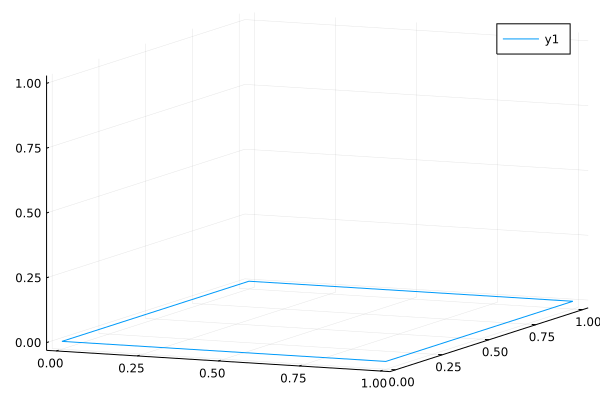

In [3]:
plot(vf)

The velocity that the vortex filament `vf` induces at a location `x` can be computed using as `inducevelocity(vf,x)`, which returns a 3-element vector representing the velocity vector.

In [4]:
x = [0.5,0.5,0.5]
inducevelocity(vf,x)

3-element Vector{Float64}:
  0.0
  0.0
 -0.3675280948196472

If you don't want the filament to be closed, provide the constructor with the keyword `isclosed=false`.


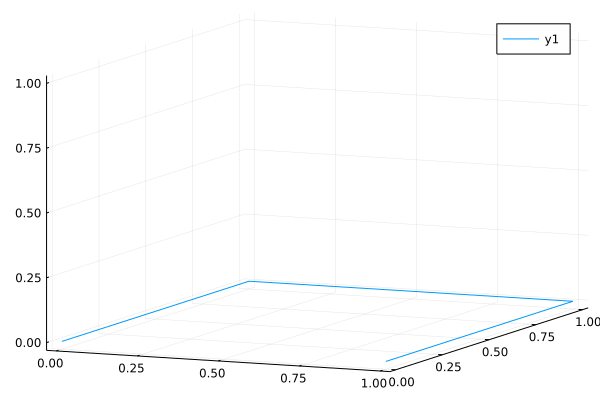

In [5]:
vf = VortexFilament(Γ,vertices,isclosed=false)
plot(vf)

The vortex filament can also be an infinite vortex filament or a semi-infinite vortex element. In these cases, you have to provide the plot axis limits for the direction in which the vortex filament extends to infinity. These filaments also work with the `inducevelocity` method.

In [6]:
vertices = [[-Inf,0.0,0.0], [Inf,0.0,0.0]]
Γ = 1.0 # strength of the vortex filament
vf = VortexFilament(Γ,vertices) # infinite vortex filament

A infinite vortex filament with 2 vertices, 1 segments, and strength Γ = 1.0


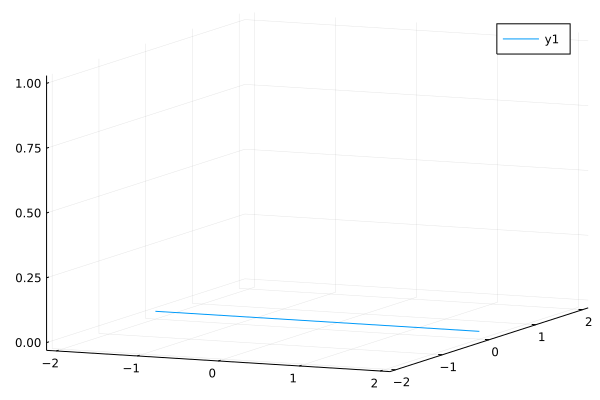

In [7]:
plot(vf,xlims=[-2,2],ylims=[-2,2])

In [8]:
vertices = [[0,0.0,0.0], [Inf,0.0,0.0]]
Γ = 1.0 # strength of the vortex filament
vf = VortexFilament(Γ,vertices) # semi-infinite vortex filament

A semi-infinite vortex filament with 2 vertices, 1 segments, and strength Γ = 1.0


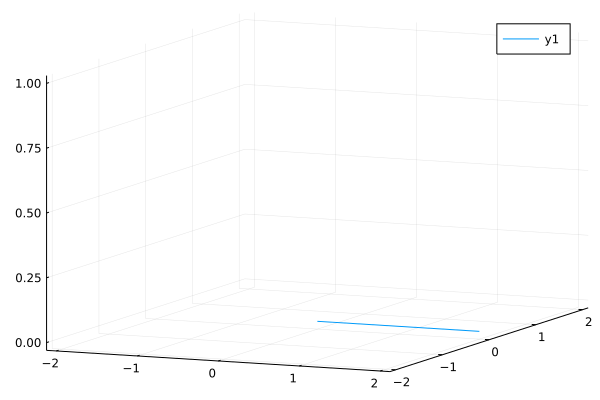

In [9]:
plot(vf,xlims=[-2,2],ylims=[-2,2])

These filaments also work with the `inducevelocity` method. This provides the possibility to model a horseshoe vortex.


In [10]:
b = 1
Γ = -1.0 # sign depends on the order of the vertices
v1 = [Inf,-b/2,0]
v2 = [0,-b/2,0]
v3 = [0,b/2,0]
v4 = [Inf,b/2,0]
vf = VortexFilament(Γ,[v1,v2,v3,v4])
yrange1 = range(-b/2,b/2,length=20)
xevals = [[0.0,y,0.0] for y in yrange1[2:end-1]];
w = inducevelocity.(Ref(vf),xevals);

We will compare the induced velocity with the formula for the downwash for a horseshoe vortex.


In [11]:
yrange2 = range(-b/2,b/2,length=100)
downwash(Γ,b,y) = -Γ/(4π)*b/((b/2)^2-y^2);

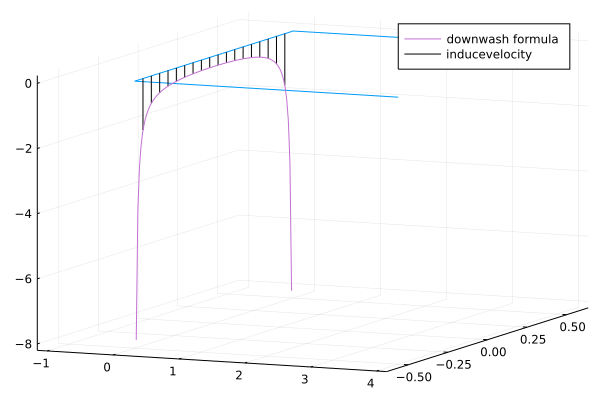

In [12]:
wvec = [[xevals[i],xevals[i]+w[i]] for i in 1:length(w)];
p = plot(vf,xlims=[-1,4],ylims=[-0.6*b,0.6*b],label=false)
for i in 1:length(wvec)
    plot3d!((v->v[1]).(wvec[i]),(v->v[2]).(wvec[i]),(v->v[3]).(wvec[i]),color=:black,label=false)
end
plot3d!(zeros(length(yrange2)),yrange2,downwash.(1.0,b,yrange2),label="downwash formula")
plot!([],[],c=:black,label="inducevelocity")